# Introduction
We are the Computer Science Graduate Student Association at the Univrsity of Oklahoma

Notebooks for this workshop and all future and prior workshops can be found on our [OU DALab github repo](https://github.com/oudalab/databitesp2020)

# Autoencoders

![AEs](https://miro.medium.com/max/3524/1*oUbsOnYKX5DEpMOK3pH_lg.png)

* Neural networks trained to reconstruct the input as the output
* The central hidden layer encodes the input
* The model learns compressed representations of high dimensional data
* Unsupervised learning of complex distributions
* Major components:

    1. Encoder: $E(X): X \rightarrow Z$

    2. Decoder: $D(Z): Z \rightarrow X$
    
    $X$ is the original input 
     
    $Z$ is the encoded representation

* Objective function: min $||X-D(Z)||^2$


# Unsupervised Learning
Only features are available 

Absence of labels or of formal patterns within the data

Extraction of meaningful information or structure, such as :
- learning denoising procedures
- learning manifolds data might lay close to
- clustering data into groups
- estimating probability densities

# Latent Space Representation

![AE Latent Representation](https://static.packt-cdn.com/products/9781789138900/graphics/0d3e8566-e133-4dae-af82-2dc3a2576e63.png)


* Hidden layer of the autoencoder learns useful properties and potentially priotizes features

# Code

In [0]:
!python --version
!apt-get install graphviz -y

In [0]:
%pylab inline
import numpy as np
import pandas as pd

from time import time
from imgaug import augmenters as iaa

import tensorflow.keras as keras
import tensorflow.keras.backend as K
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras import callbacks, regularizers, Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Lambda, Layer, Dense, Input
from tensorflow.keras.layers import Conv2D, MaxPool2D, UpSampling2D

In [0]:
keras.__version__

In [0]:
# LOAD DATA
# [Fashon MNIST](https://www.tensorflow.org/tutorials/keras/classification)


# BASIC PRE_PROCESS
# Scale data to range [0,1]



# Display data shape


For the training set, we have 60000 examples that are 28 by 28 pixel images. 
Each image is labeled with a number from 0 to 9 for a differnt article of clothing.

(60000, 28, 28), (60000,)

For the validation set, we have 10000 examples

(10000, 28, 28), (10000,)

In [0]:
# Display example image
plt.imshow(train_x[0].reshape(28,28))
plt.title('Class: %d' % train_y[0])
plt.axis('off')

In [0]:
# figure with 11x11 images
n = 11 
img_size = 28
figure = np.zeros((img_size * n, img_size * n))
# we will sample n points within [-15, 15] standard deviations
grid_x = np.linspace(0, 5, n)
grid_y = np.linspace(0, 5, n)

for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        # Reshape and display example image
        img = # TODO
        figure[i * img_size: (i + 1) * img_size,
               j * img_size: (j + 1) * img_size] = # TODO

plt.figure(figsize=(10, 10))
plt.imshow(figure)
plt.show()

In [0]:
# Get the class labels and the corresponding counts
classes, class_counts = # TODO
class_names = ['Top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# TODO: Bar Plot






### Basic Neural Network Architecture

1. Input layer
2. Some number of hidden layers
    * each layer has some number of nodes
    * each layer has an activation function
3. Output layer

![Simple NN](https://miro.medium.com/max/1100/1*YgJ6SYO7byjfCmt5uV0PmA.png)

Activation functions, $\phi$, can be anything. Generally, these are nonlinear functions such as sigmoid, tanh, ReLU, and ELU.

![A neuron](https://i.ytimg.com/vi/kft1AJ9WVDk/maxresdefault.jpg)

In [0]:
# RESHAPE DATA INTO VECTOR FORMAT
# The pixels are now rearranged into a single vector instead of a 2D matrix



# Display data shape


### Traditional Autoencoder
Now that we know a bit about the dataset, let's build an autoencoder to create a compressed representation of our images.

In [0]:
# Input placeholder


# Encoded input representation





# Model maps input to an encoded representation




# Lossy reconstruction of the input





# Model mapping latent representation to input reconstruction




# FULL AE MODEL
# Model mapping input to its reconstruction


# Display summary of model architecture


# Compile model



In [0]:
# Keras Callback for early stopping of training



# Train the model






# RECONSTRUCTION
# 'Predict' the reconstruction, using the validation set


# Compare original output to reconstructed





### Sparse Autoencoder
Optimize compressed output by reducing the amount of memory using sparse representations instead 

To make representations more compact, impose a sparsity constraint on the activition of the hidden representations (this is the activity 
regularizer in Keras), such that fewer units get activated at a given time

In Keras we use the "activity_regularizer" parameter for each layer to apply penalties on parameters or activations during optimization. 
Penalties are incorporated in the loss function

In [0]:
# Include activity constraint by defining a small value for the activity_regularizer
# ref (https://www.tensorflow.org/api_docs/python/tf/keras/regularizers/Regularizer)

# Input placeholder
input_img = Input(shape=(784,))

# Encoded input representation



# Model maps input to an encoded representation




# Lossy reconstruction of the input
l5_out = Dense(500, activation='relu', name='decoder_L1')(latent)
l6_out = Dense(500, activation='relu', name='decoder_L2')(l5_out)
l7_out = Dense(2000, activation='relu', name='decoder_L3')(l6_out)
sparse_recon = Dense(784)(l7_out)

# Model mapping latent representation to input reconstruction
sparse_decoder = Model(encoded, decoded)

# Model mapping input to its reconstruction
sparse_autoencoder = Model(input_img, sparse_recon)

# Display summary of model architecture
sparse_autoencoder.summary()

# Compile model
sparse_autoencoder.compile(optimizer='adam', loss='mse')

In [0]:
# Train the model
t0 = time()
train_history = sparse_autoencoder.fit(train_x, train_x, 
                                       epochs=10, 
                                       batch_size=2048,
                                       validation_data=(val_x, val_x))
t1 = time()
duration = (t1 - t0) / 60 # convert to minutes
print('Elapsed Time: %.02f min' % duration)



# RECONSTRUCTION
recon_x = sparse_autoencoder.predict(val_x)

# Compare original output to reconstructed
plt.subplot(1, 2, 1)
plt.imshow(recon_x[0].reshape(28, 28), cmap='gray')
plt.title('Reconstruction')

plt.subplot(1, 2, 2)
plt.imshow(val_x[0].reshape(28, 28), cmap='gray')
plt.title('Actual')

### Denoising AutoEncoders
When an image gets corrupted, or contains noise, there is no straight-forward way to remove the noise. 

We want to "denoise" the image and convert the noisy image into a somewhat clearer image with most (or all) of the noise removed.

Example from a simple model:

![Denoising](https://drive.google.com/uc?id=12W8w9c-CtUIl7UeWRmFrY5E9Cw1qD_pk)

In [0]:
# LOAD DATA


# Introduce noise to some of the data
# NOTE: In reality we don't know the source or structure of the noise





In [0]:
# PRE_PROCESS THE DATA




# RESHAPE data into tensors for convolutional network





#### Convolutional Neural Network

Similar structure to a basic neural network
1. Input layer
2. Some number of hidden layers
    * convolution 
    * max or mean pooling 
    * activation function
    * fully connected dense layers
3. Output layer

![CNN](https://adeshpande3.github.io/assets/Cover.png)

In [0]:
# Input placeholder



# Encoded input representation
# padding=same: zero padding during convolution and pooling
# padding=valid: no padding during convolution and pooling




# Model mapping input to its encoded representation




# Lossy reconstruction of the input




# Model mapping input to its reconstruction



# Display Summary

# Compile model


In [0]:
# Train the model

# NOTE: Noisy image is the input; try to reconstruct the original denoised image
# Select subset of data to speed up learning




# RECONSTRUCTION


# Compare reconstruction to the original input and the noisy input


### Variational AutoEncoders
Image Generation with Variational AutoEncoders

Main distinction between traditional autoencoders and variational autoencoders is that instead of a compressed bottleneck of information, we attempt to model th probability distribution of the training 
data. 

Generally, from the mean and standard deviation of the data, we can approximate the properties of the population. (Note: the modeled central tendency does not have to be the mean, and the spread does not have to be the standard deviation)

VAEs learn stochastic/probabilitic mappings between the input space and latent space

In this tutorial, the population represents all images that can be in the category of class of training data.

Latent Space: if assumed to have Gayssian distribution, it's parameters are mean, and standard deviation
![](https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2019/08/Line-Plot-of-Events-vs-Probability-or-the-Probability-Density-Function-for-the-Normal-Distribution.png)

![VAE](https://drive.google.com/uc?id=1HdsZ-0xL7iBBLNbchJk8xb9S8PhSqQI8)

![VAE](https://cdn.analyticsvidhya.com/wp-content/uploads/2018/06/1_Y49K5UhSMzB3TcA2FKzPMQ.png)

Variational Autoencoder loss considers two things:
1. The negative log likelihood of the output
$$-E_{z \approx q_\theta(z|x_i)} [log (p_\phi (x_i|z))]$$

2. Kullback-Leibler Divergence (KLD) of the "actual" (i.e. the prior) distribution and the predicted distribution. 
    * KLD is a metric describing the difference between two distributions
    $$KL(q_\phi (z|x_i) || p(z)) = q_\phi (z|x_i) * log(\frac{q_\phi (z|x_i)}{p(z)})$$

Combining parts (1) and (2) to construct our loss function:
$$loss = l_i(\theta, \phi)=-E_{z \approx q_\theta(z|x_i)} [log (p_\phi (x_i|z))] + KL(q_\phi (z|x_i) || p(z))$$

In [0]:
# LOAD DATA


In [0]:
# PRE-PROCESS DATA



# VECTORIZE DATA



In [0]:
# Input placeholder


# Encoded input representation




# Define layer to incorporate KL divergence into the training loss




# Define function for sampling in the latent space




# Create the KLD layer for the model


# Sample from the latent space distribution


# Model mapping to input representation (i.e. the encoder)



# Model mapping input to its reconstruction




# Model mapping an input to its reconstruction


# Display model summary


# Function to compute the negative log likelihood

# Compile model


In [0]:
# Train the model to generate images



# Generation



# Compare the model output to the original



In [0]:
# DISPLAY LINEAR INTERPOLATION IN THE LATENT SPACE
n = 11  # figure with 11x11 imgs
img_size = 28
figure = np.zeros((img_size * n, img_size * n))
# we will sample n points within [-11, 11] standard deviations
grid_x = np.linspace(-1, 1, n)
grid_y = np.linspace(-1, 1, n)

for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        z_sample = np.repeat(np.array([[xi + yi]]), 10, axis=1)
        x_decoded = decoder.predict(z_sample)
        img = x_decoded[0].reshape(img_size, img_size)
        figure[i * img_size: (i + 1) * img_size,
               j * img_size: (j + 1) * img_size] = img

plt.figure(figsize=(10, 10))
plt.imshow(figure)
plt.show()

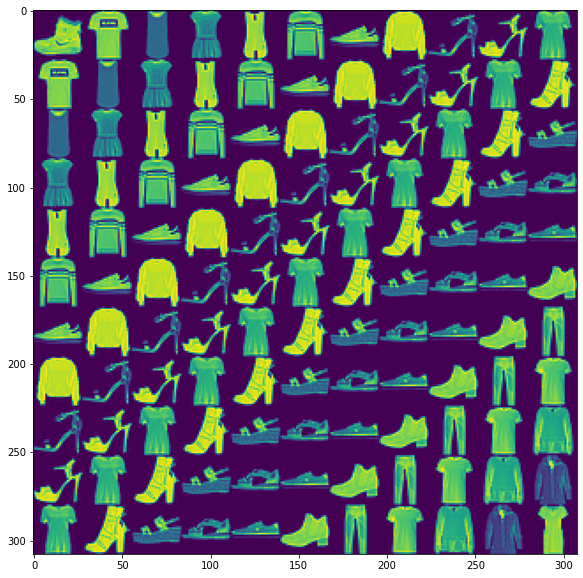

In [0]:
# DISPLAY LINEAR INTERPOLATION IN THE LATENT SPACE
n = 11  # figure with 11x11 imgs
img_size = 28
figure = np.zeros((img_size * n, img_size * n))
# we will sample n points within [-15, 15] standard deviations
grid_x = np.linspace(0, 5, n)
grid_y = np.linspace(0, 5, n)

for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        # Display example image
        img = train_x[i + j].reshape(28,28)
        #plt.title('Class: %d' % train_y[0])
        figure[i * img_size: (i + 1) * img_size,
               j * img_size: (j + 1) * img_size] = img

plt.figure(figsize=(10, 10))
plt.imshow(figure)
plt.show()

# THANK YOU from OU's CSGSA

If you went through the tutorial please complete this brief [sign in form](https://forms.office.com/Pages/ResponsePage.aspx?id=neB9nDSQwUS0YsRk_s4gShSiFd0SB9NPmtonqJ4UHH1UMVBTS1BDOElEMkM1U09FSE9HMzM0Rkw4TiQlQCN0PWcu)

Facebook 
[@oucsgsa](https://www.facebook.com/oucsgsa/?ref=page_internal)

![fb_tag](https://drive.google.com/uc?id=13Ph4OnbDWNqd1nXoSfCykCSQXVy_SEIm)

Instagram

![insta_tag](https://drive.google.com/uc?id=1_ZXNZMqEyB-LfDLnhVTeiS1-2ywih4BR)
